# EDA on Review Dataset

## 1. Load Dataset

In [144]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, ttest_ind, f_oneway
import numpy as np

# Load dataset
data = pd.read_csv('review_dataset_v2.csv')

# Display data info and basic overview
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1456 non-null   object 
 1   review               1456 non-null   float64
 2   rating               1456 non-null   int64  
 3   company              1456 non-null   object 
 4   country              1456 non-null   object 
 5   date                 1456 non-null   object 
 6   topic                1456 non-null   object 
 7   content              1456 non-null   object 
 8   sentiment_score      1456 non-null   float64
 9   sentiment_magnitude  1456 non-null   float64
 10  entities             1456 non-null   object 
 11  review_class         1456 non-null   object 
 12  positive_reasons     1456 non-null   object 
 13  negative_reasons     1456 non-null   object 
 14  detected_language    1456 non-null   object 
 15  category             700 non-null    o

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence
0,vladimiro mascaro,3.0,1,amazon,united kingdom,2024-10-01 18:25:37,4 months of total incopetence,since july until this month of all my orders 8...,-0.6,0.6,"orders, orders, thing, direct debit, headphone...",negative,no_positive,since july until this month of all my orders 8...,en,shopping',0.62
1,lucy loo,9.0,1,amazon,united kingdom,2024-10-01 09:57:32,driver stealing,as a family we order from amazon almost daily ...,-0.8,0.8,"amazon, family, change, one, nothing, packages...",negative,no_positive,as a family we order from amazon almost daily ...,en,NaN,NaN
2,da,21.0,5,amazon,united kingdom,2024-10-01 11:36:09,where is the negativity coming from,probably the only store that 1 delivers ontime...,0.1,0.1,"store, customers, prices, competitors, valuefo...",positive,probably the only store that 1 delivers ontime...,no_negative,en,NaN,NaN
3,vicki study,1.0,1,amazon,united kingdom,2024-10-01 15:36:33,absolutely appalling customer service,the customer service has been absolutely appal...,-0.7,0.7,"customer service, calls, ive, fault, issue, am...",negative,no_positive,the customer service has been absolutely appal...,en,NaN,NaN
4,jeffrey bruce,5.0,1,amazon,united kingdom,2024-10-01 17:09:02,amazon are quick enough to take payment,amazon are quick enough to take payment for or...,-0.7,0.7,"amazon, payment, orders, worst, claim, custome...",negative,no_positive,amazon are quick enough to take payment for or...,en,shopping',0.62


## 2. Data Preparation

In [153]:

data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['month_year'] = data['date'].dt.to_period('M')

### Analysis of `review` column

In [132]:
print(data['review'].describe())

z_scores = zscore(data['review'])
outliers = data[z_scores > 3].head(10) 
print(f"Top 10 Outliers (Z-score > 3) for review:\n", outliers)


count    1456.000000
mean        5.976648
std        13.457001
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       172.000000
Name: review, dtype: float64
Top 10 Outliers (Z-score > 3) for review:
                     name  review  rating company         country  \
26              p fisher    93.0       1  amazon  united kingdom   
81            stephen n.    59.0       1  amazon  united kingdom   
83        joanne collins    54.0       1  amazon  united kingdom   
123                 dmac    77.0       1  amazon  united kingdom   
130          ian wooller   122.0       1  amazon  united kingdom   
195  willy villa-shonner    63.0       1  amazon  united kingdom   
202    raymond van spall   172.0       1  amazon  united kingdom   
221        james procter    52.0       1  amazon  united kingdom   
319        darren howard   150.0       1    ebay  united kingdom   
330       freedom spirit   133.0       1    ebay  united kingdom   

           

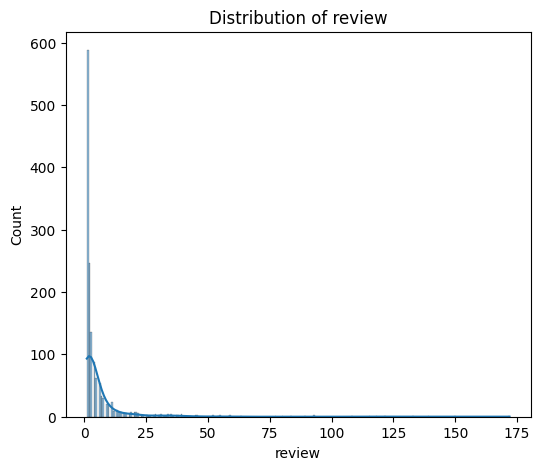

In [154]:
# Histogram and KDE for `review`
plt.figure(figsize=(6, 5))
sns.histplot(data['review'], kde=True)
plt.title('Distribution of review')
plt.show()


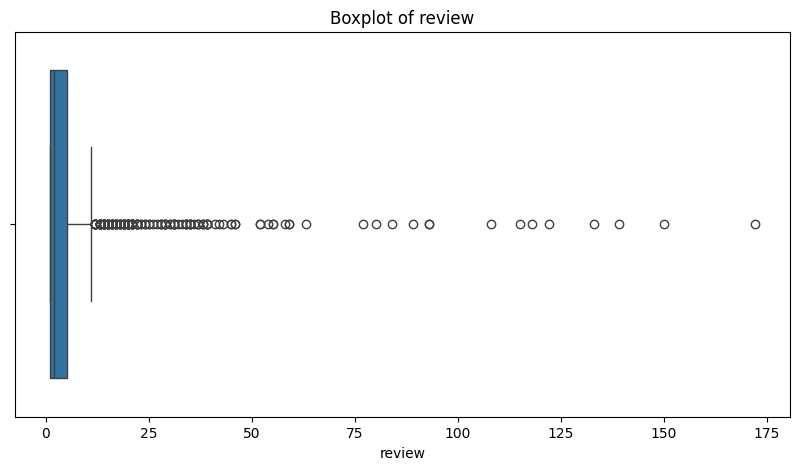

In [134]:
# Boxplot for `review`
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['review'])
plt.title('Boxplot of review')
plt.show()


### Conclusion for `review`

Summary of `review`, including observations on distribution, outliers, and statistical insights.

### Analysis of `rating` column

In [135]:
# Summary statistics and Z-score for `rating`
print(data['rating'].describe())

# Calculate Z-scores for outlier detection (top 10 outliers only)
z_scores = zscore(data['rating'])
outliers = data[z_scores > 3].head(10)  # Top 10 high outliers
print(f"Top 10 Outliers (Z-score > 3) for rating:\n", outliers)


count    1456.000000
mean        1.940247
std         1.597636
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: rating, dtype: float64
Top 10 Outliers (Z-score > 3) for rating:
 Empty DataFrame
Columns: [name, review, rating, company, country, date, topic, content, sentiment_score, sentiment_magnitude, entities, review_class, positive_reasons, negative_reasons, detected_language, category, confidence, month_year]
Index: []


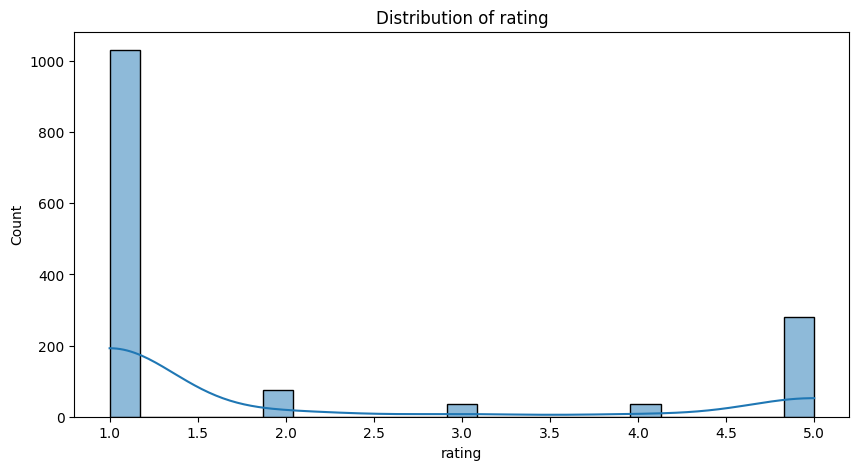

In [136]:
# Histogram and KDE for `rating`
plt.figure(figsize=(10, 5))
sns.histplot(data['rating'], kde=True)
plt.title('Distribution of rating')
plt.show()


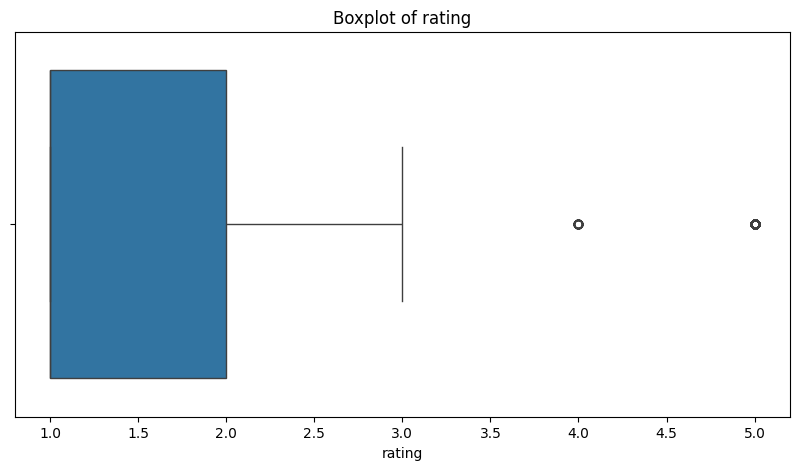

In [137]:
# Boxplot for `rating`
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['rating'])
plt.title('Boxplot of rating')
plt.show()


### Conclusion for `rating`

Summary of `rating`, including observations on distribution, outliers, and statistical insights.

### Analysis of `sentiment_score` column

In [138]:
# Summary statistics and Z-score for `sentiment_score`
print(data['sentiment_score'].describe())

# Calculate Z-scores for outlier detection (top 10 outliers only)
z_scores = zscore(data['sentiment_score'])
outliers = data[z_scores > 3].head(10)  # Top 10 high outliers
print(f"Top 10 Outliers (Z-score > 3) for sentiment_score:\n", outliers)


count    1456.000000
mean       -0.392514
std         0.620247
min        -0.900000
25%        -0.800000
50%        -0.700000
75%        -0.500000
max         0.900000
Name: sentiment_score, dtype: float64
Top 10 Outliers (Z-score > 3) for sentiment_score:
 Empty DataFrame
Columns: [name, review, rating, company, country, date, topic, content, sentiment_score, sentiment_magnitude, entities, review_class, positive_reasons, negative_reasons, detected_language, category, confidence, month_year]
Index: []


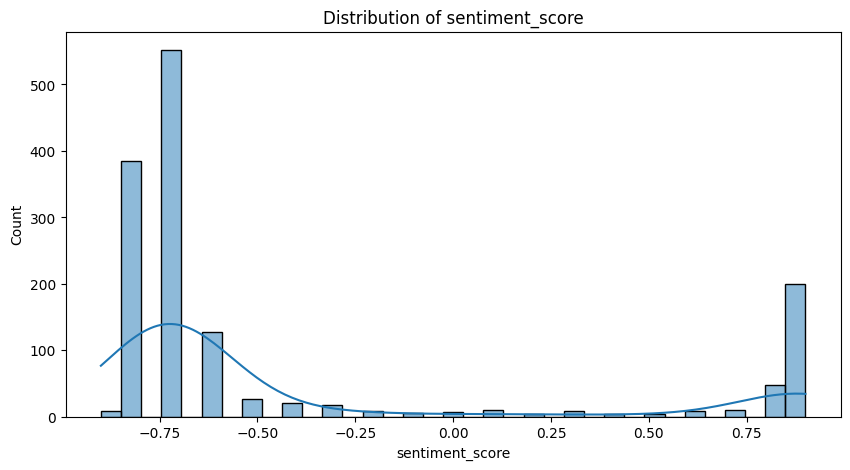

In [139]:
# Histogram and KDE for `sentiment_score`
plt.figure(figsize=(10, 5))
sns.histplot(data['sentiment_score'], kde=True)
plt.title('Distribution of sentiment_score')
plt.show()


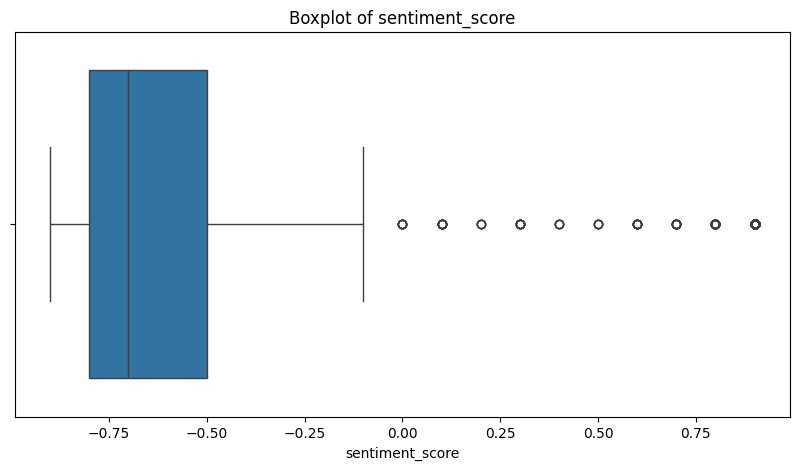

In [140]:
# Boxplot for `sentiment_score`
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['sentiment_score'])
plt.title('Boxplot of sentiment_score')
plt.show()


### Conclusion for `sentiment_score`

Summary of `sentiment_score`, including observations on distribution, outliers, and statistical insights.

### Analysis of `sentiment_magnitude` column

In [141]:
# Summary statistics and Z-score for `sentiment_magnitude`
print(data['sentiment_magnitude'].describe())

# Calculate Z-scores for outlier detection (top 10 outliers only)
z_scores = zscore(data['sentiment_magnitude'])
outliers = data[z_scores > 3].head(10)  # Top 10 high outliers
print(f"Top 10 Outliers (Z-score > 3) for sentiment_magnitude:\n", outliers)


count    1456.000000
mean        0.780769
std         0.280502
min         0.000000
25%         0.700000
50%         0.700000
75%         0.800000
max         4.000000
Name: sentiment_magnitude, dtype: float64
Top 10 Outliers (Z-score > 3) for sentiment_magnitude:
                   name  review  rating  company         country  \
161           customer     5.0       1   amazon          canada   
186    bronson brieske     2.0       1   amazon   united states   
247   iryna kharchenko     2.0       1   amazon     netherlands   
435            pandora     5.0       1     ebay  united kingdom   
474             louise     1.0       1     ebay   united states   
492     karen o reilly    12.0       1     ebay         ireland   
505          anonymous     2.0       1     ebay   united states   
559         ross adams    58.0       1     ebay  united kingdom   
564              joy b     1.0       1     ebay   united states   
1002            eric c     5.0       2  walmart   united states 

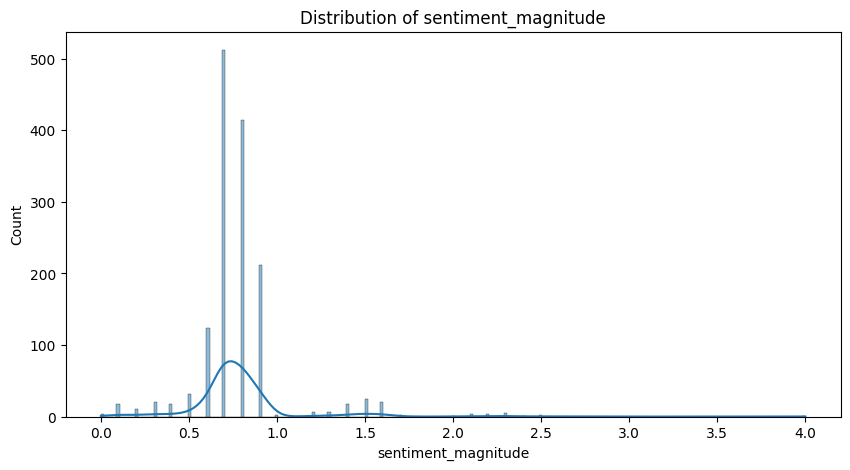

In [145]:
# Histogram and KDE for `sentiment_magnitude`
plt.figure(figsize=(10, 5))
sns.histplot(data['sentiment_magnitude'], kde=True)
plt.title('Distribution of sentiment_magnitude')
plt.show()


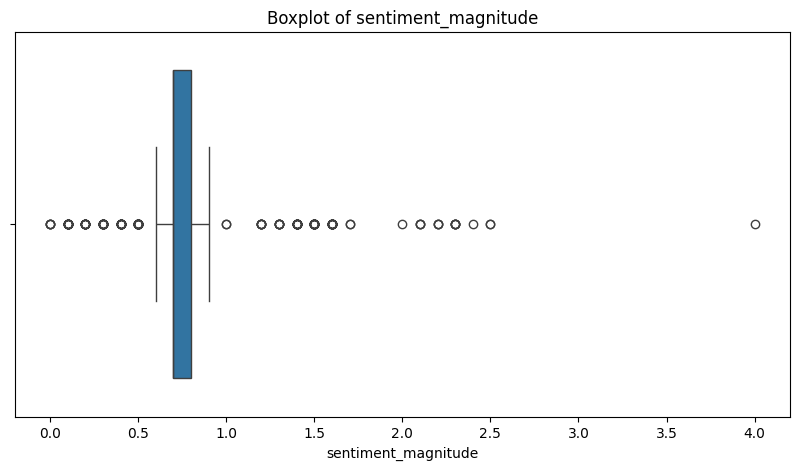

In [146]:
# Boxplot for `sentiment_magnitude`
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['sentiment_magnitude'])
plt.title('Boxplot of sentiment_magnitude')
plt.show()


### Conclusion for `sentiment_magnitude`

Summary of `sentiment_magnitude`, including observations on distribution, outliers, and statistical insights.

### Analysis of `confidence`

In [147]:
# Summary statistics and Z-score for `confidence`
print(data['confidence'].describe())

# Calculate Z-scores for outlier detection (top 10 outliers only)
z_scores = zscore(data['confidence'])
outliers = data[z_scores > 3].head(10)  # Top 10 high outliers
print(f"Top 10 Outliers (Z-score > 3) for confidence:\n", outliers)


count    681.000000
mean       0.692291
std        0.142589
min        0.500000
25%        0.560000
50%        0.670000
75%        0.810000
max        0.990000
Name: confidence, dtype: float64
Top 10 Outliers (Z-score > 3) for confidence:
 Empty DataFrame
Columns: [name, review, rating, company, country, date, topic, content, sentiment_score, sentiment_magnitude, entities, review_class, positive_reasons, negative_reasons, detected_language, category, confidence]
Index: []


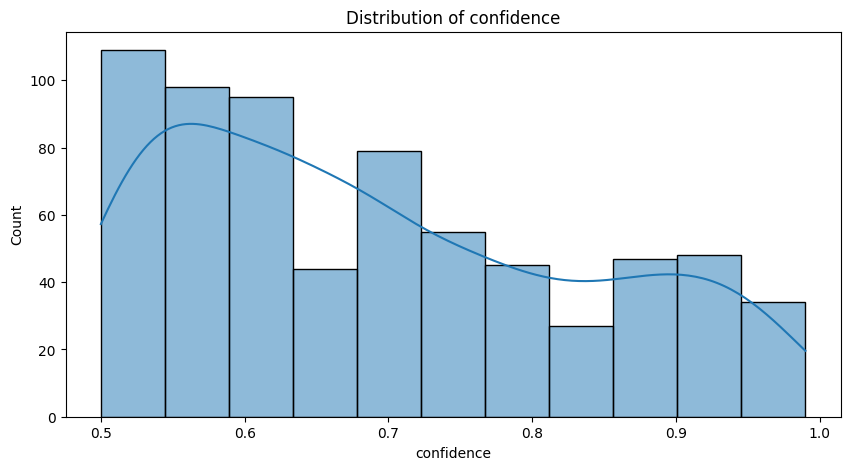

In [148]:
# Histogram and KDE for `confidence`
plt.figure(figsize=(10, 5))
sns.histplot(data['confidence'], kde=True)
plt.title('Distribution of confidence')
plt.show()


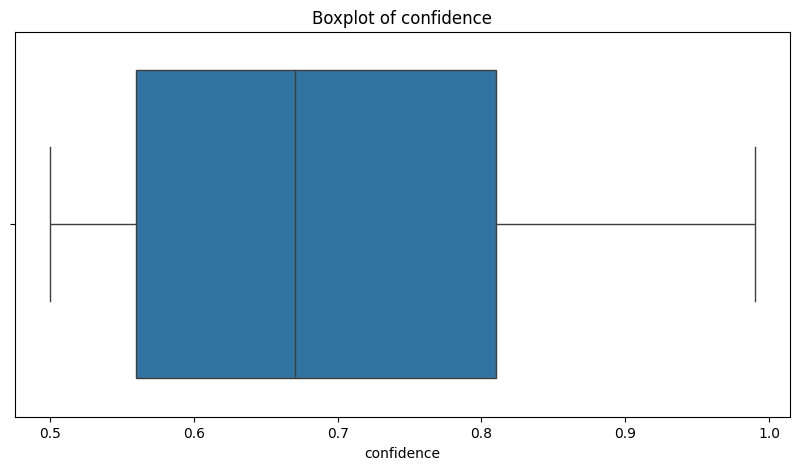

In [149]:
# Boxplot for `confidence`
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['confidence'])
plt.title('Boxplot of confidence')
plt.show()


### Conclusion for `confidence`

Summary of `confidence`, including observations on distribution, outliers, and statistical insights.

### Analysis of `company` column

### Value Counts of `company`

In [105]:
# Display top 10 value counts for `company`
print(data['company'].value_counts().head(10))


company
bestbuy    299
ebay       297
walmart    296
amazon     295
alibaba    269
Name: count, dtype: int64


### Count Plot of `company`

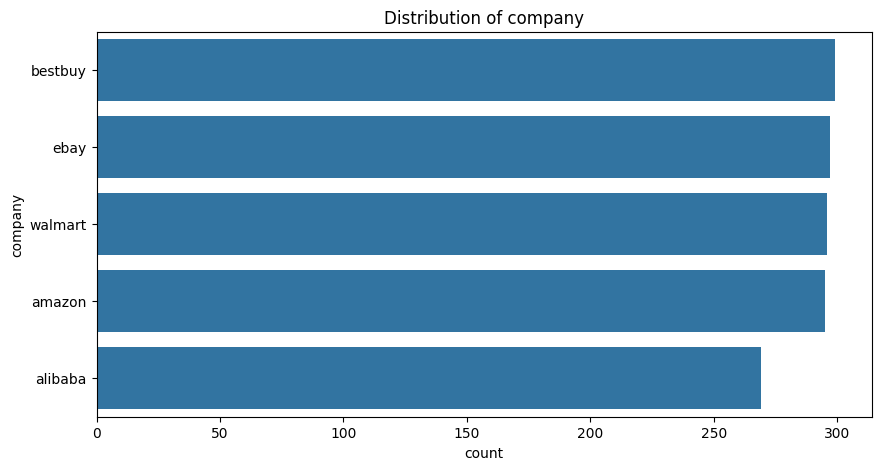

In [106]:
# Count plot for `company` to see distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y=data['company'], order=data['company'].value_counts().index)
plt.title('Distribution of company')
plt.show()


### Conclusion for `company`

Insights on `company`, focusing on prominent categories, patterns, and notable findings.

### Analysis of `country` column

In [107]:
# Display top 10 value counts for `country`
print(data['country'].value_counts().head(10))


country
united states     863
united kingdom    239
canada            110
australia          25
denmark            15
germany            12
france              8
netherlands         8
spain               6
pakistan            6
Name: count, dtype: int64


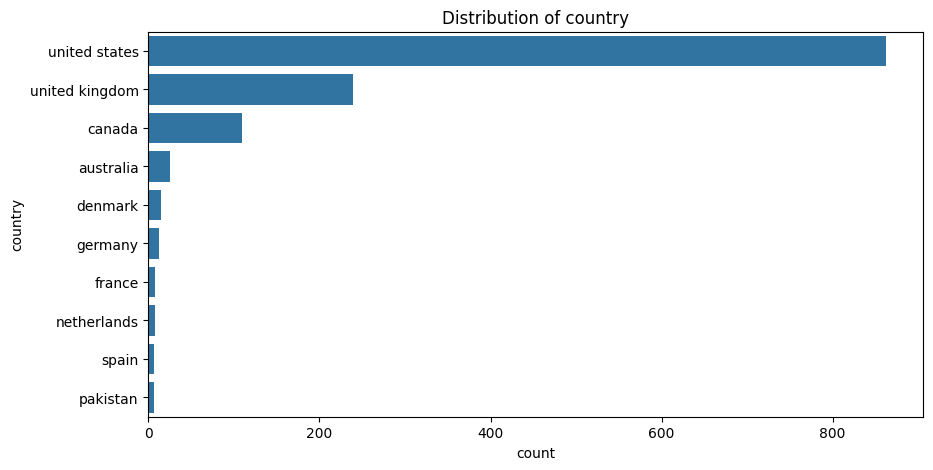

In [108]:
# Count plot for `country` to see distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y=data['country'], order=data['country'].value_counts().head(10).index)
plt.title('Distribution of country')
plt.show()


### Conclusion for `country`

Insights on `country`, focusing on prominent categories, patterns, and notable findings.

### Analysis of `topic` column

In [109]:
# Display top 10 value counts for `topic`
print(data['topic'].value_counts().head(10))


topic
excellent service            4
terrible experience          3
great                        3
terrible customer service    3
great experience             3
horrible customer service    3
good experience              2
terrible service             2
fast shipping                2
ebay is trash                2
Name: count, dtype: int64


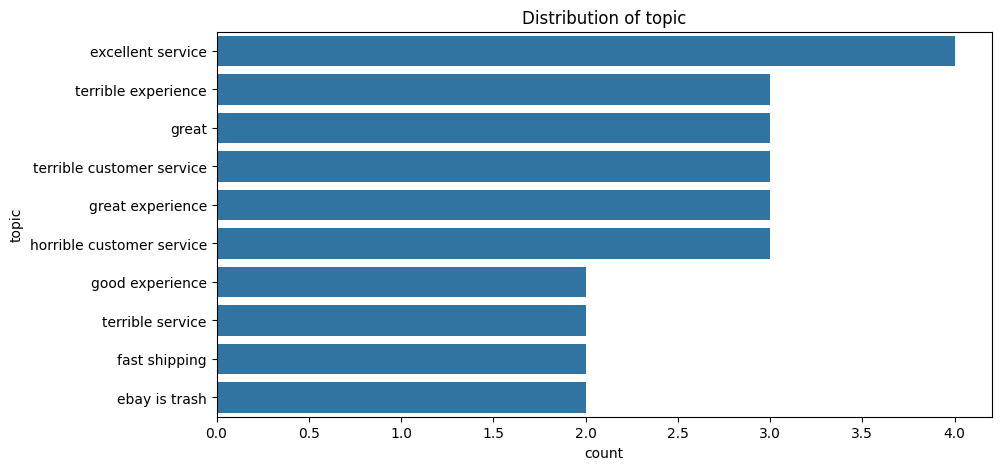

In [110]:
# Count plot for `topic` to see distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y=data['topic'], order=data['topic'].value_counts().head(10).index)
plt.title('Distribution of topic')
plt.show()


### Conclusion for `topic`

Insights on `topic`, focusing on prominent categories, patterns, and notable findings.

### Analysis of `entities` column

In [111]:
# Display top 10 value counts for `entities`
print(data['entities'].value_counts().head(10))


entities
Not_entity                    6
service                       5
experience                    4
delivery                      3
customer service              3
company                       2
shipping, customer service    2
everything                    2
supplier                      2
customer service, product     2
Name: count, dtype: int64


### Count Plot of `entities`

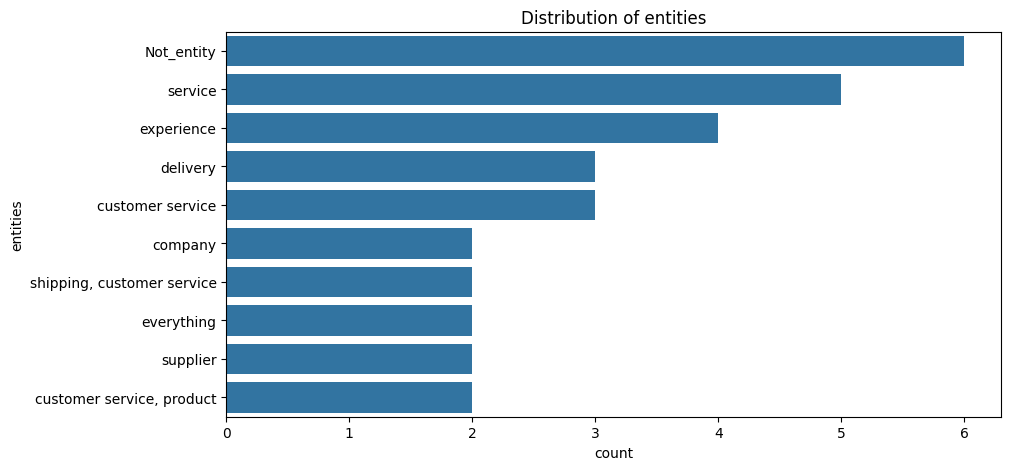

In [112]:
# Count plot for `entities` to see distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y=data['entities'], order=data['entities'].value_counts().head(10).index)
plt.title('Distribution of entities')
plt.show()


### Conclusion for `entities`

Insights on `entities`, focusing on prominent categories, patterns, and notable findings.

### Analysis of `review_class` column

In [113]:
# Display top 10 value counts for `review_class`
print(data['review_class'].value_counts().head(10))


review_class
negative    1154
positive     302
Name: count, dtype: int64


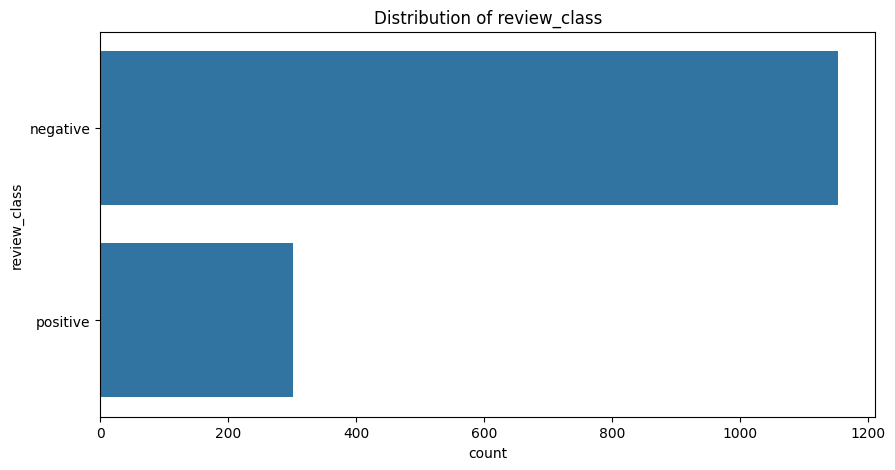

In [114]:
# Count plot for `review_class` to see distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y=data['review_class'], order=data['review_class'].value_counts().index)
plt.title('Distribution of review_class')
plt.show()


### Conclusion for `review_class`

Insights on `review_class`, focusing on prominent categories, patterns, and notable findings.

### Analysis of `category` column

In [115]:
# Display top 10 value counts for `category`
print(data['category'].value_counts().head(10))


category
shopping'                   136
shopping                    126
computers & electronics      58
business & industrial'       45
home & garden                38
business & industrial        35
home & garden'               26
arts & entertainment'        25
computers & electronics'     25
autos & vehicles             21
Name: count, dtype: int64


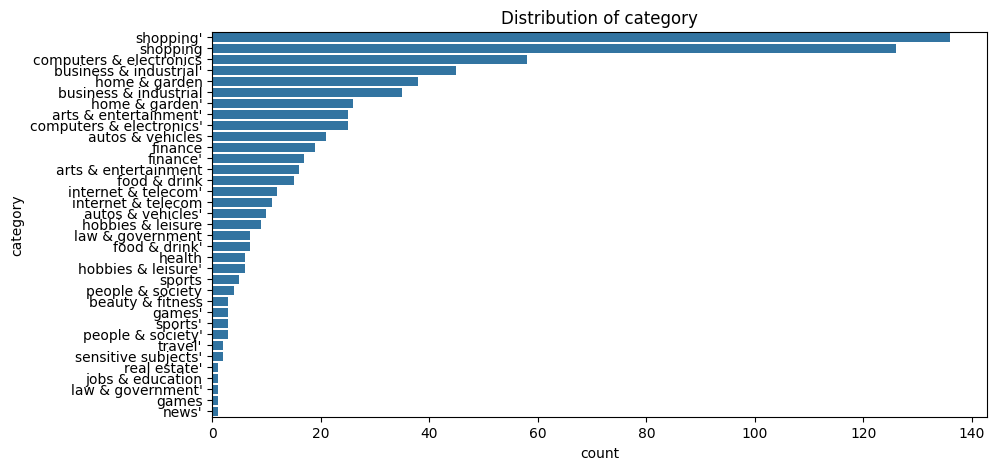

In [116]:
# Count plot for `category` to see distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y=data['category'], order=data['category'].value_counts().index)
plt.title('Distribution of category')
plt.show()


### Conclusion for `category`

Insights on `category`, focusing on prominent categories, patterns, and notable findings.

## Multivariate Analysis

### Pairwise Analysis: `review` and `rating` column

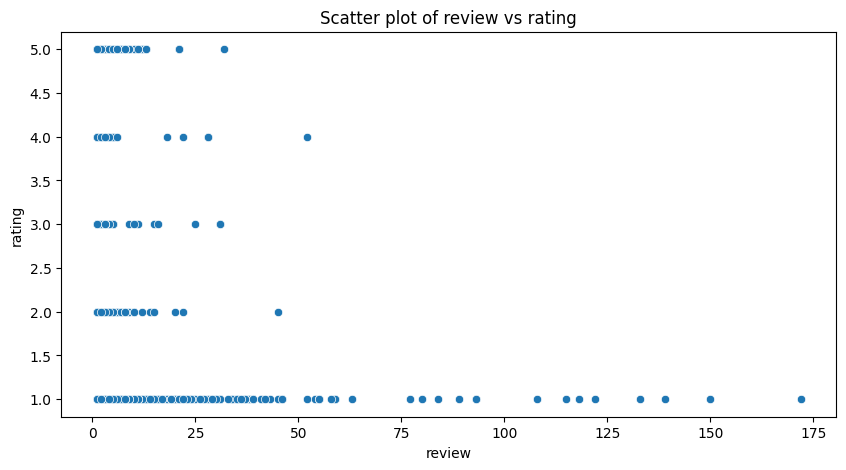

Correlation between review and rating:  -0.12403554276675124


In [117]:
# Scatter plot and correlation coefficient for `review` vs `rating`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['review'], y=data['rating'])
plt.title('Scatter plot of review vs rating')
plt.show()

# Calculate and display correlation coefficient
correlation = data['review'].corr(data['rating'])
print(f"Correlation between review and rating: ", correlation)


### Conclusion for `review` and `rating`

Insights from the relationship between `review` and `rating`, including correlation strength and observed patterns in the scatter plot.

### Pairwise Analysis: `review` and `sentiment_score`

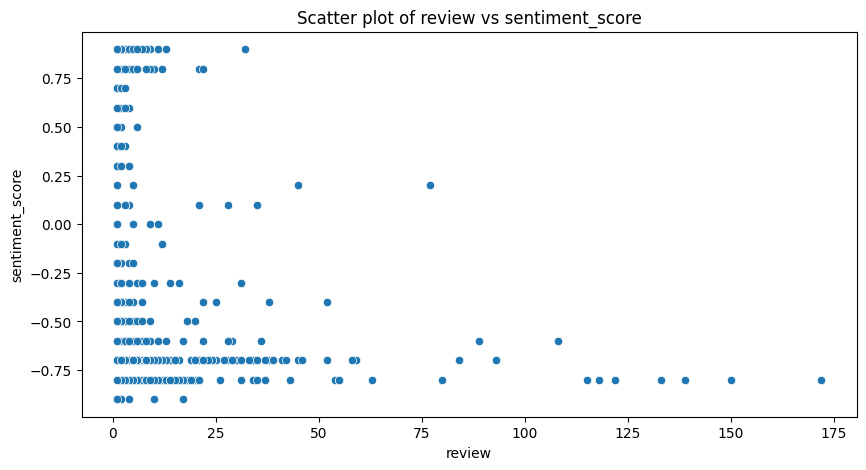

Correlation between review and sentiment_score:  -0.12350919025942088


In [118]:
# Scatter plot and correlation coefficient for `review` vs `sentiment_score`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['review'], y=data['sentiment_score'])
plt.title('Scatter plot of review vs sentiment_score')
plt.show()

# Calculate and display correlation coefficient
correlation = data['review'].corr(data['sentiment_score'])
print(f"Correlation between review and sentiment_score: ", correlation)


### Conclusion for `review` and `sentiment_score`

Insights from the relationship between `review` and `sentiment_score`, including correlation strength and observed patterns in the scatter plot.

### Pairwise Analysis: `review` and `sentiment_magnitude`

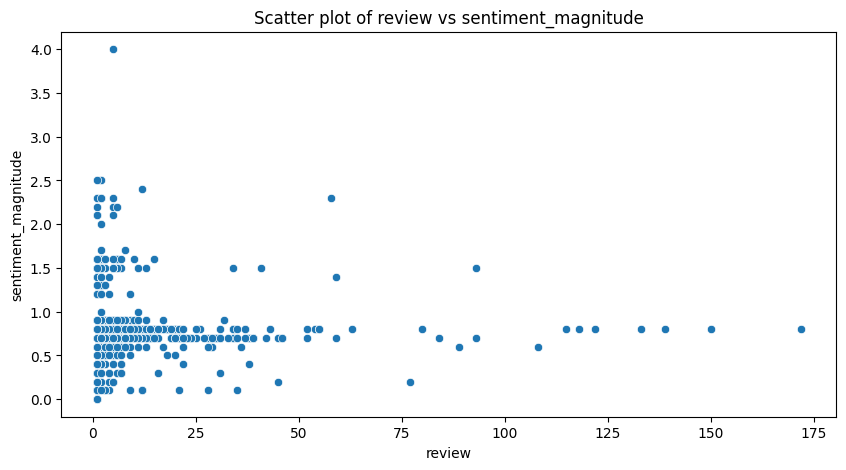

Correlation between review and sentiment_magnitude:  -0.011353129281387134


In [119]:
# Scatter plot and correlation coefficient for `review` vs `sentiment_magnitude`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['review'], y=data['sentiment_magnitude'])
plt.title('Scatter plot of review vs sentiment_magnitude')
plt.show()

# Calculate and display correlation coefficient
correlation = data['review'].corr(data['sentiment_magnitude'])
print(f"Correlation between review and sentiment_magnitude: ", correlation)


### Conclusion for `review` and `sentiment_magnitude`

Insights from the relationship between `review` and `sentiment_magnitude`, including correlation strength and observed patterns in the scatter plot.

### Pairwise Analysis: `review` and `confidence`

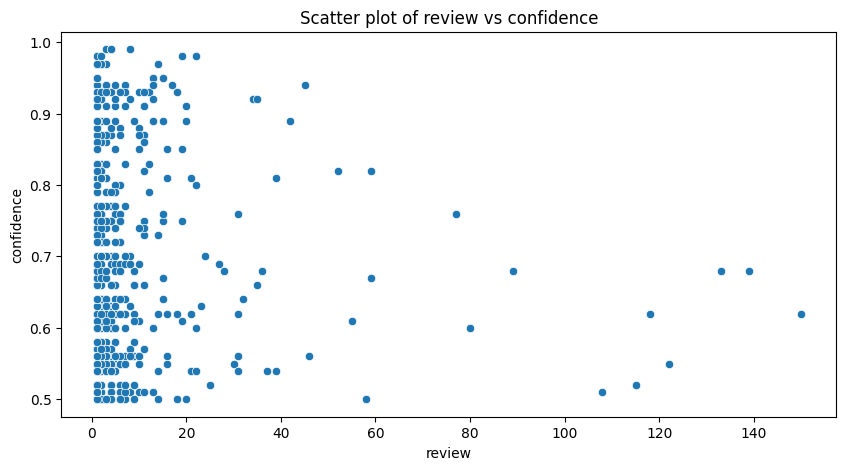

Correlation between review and confidence:  -0.04197717567509731


In [120]:
# Scatter plot and correlation coefficient for `review` vs `confidence`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['review'], y=data['confidence'])
plt.title('Scatter plot of review vs confidence')
plt.show()

# Calculate and display correlation coefficient
correlation = data['review'].corr(data['confidence'])
print(f"Correlation between review and confidence: ", correlation)


### Conclusion for `review` and `confidence`

Insights from the relationship between `review` and `confidence`, including correlation strength and observed patterns in the scatter plot.

`rating` and `sentiment_score`

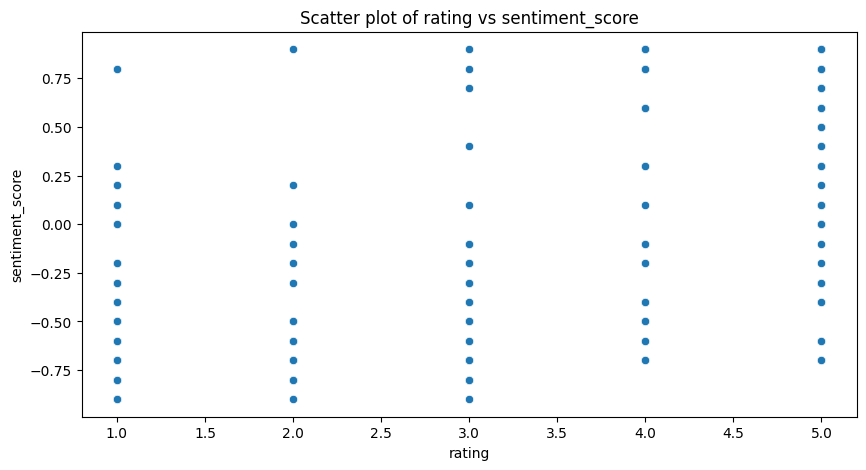

Correlation between rating and sentiment_score:  0.9195790017097428


In [121]:
# Scatter plot and correlation coefficient for `rating` vs `sentiment_score`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['rating'], y=data['sentiment_score'])
plt.title('Scatter plot of rating vs sentiment_score')
plt.show()

# Calculate and display correlation coefficient
correlation = data['rating'].corr(data['sentiment_score'])
print(f"Correlation between rating and sentiment_score: ", correlation)


### Conclusion for `rating` and `sentiment_score`

Insights from the relationship between `rating` and `sentiment_score`, including correlation strength and observed patterns in the scatter plot.

### Pairwise Analysis: `rating` and `sentiment_magnitude`

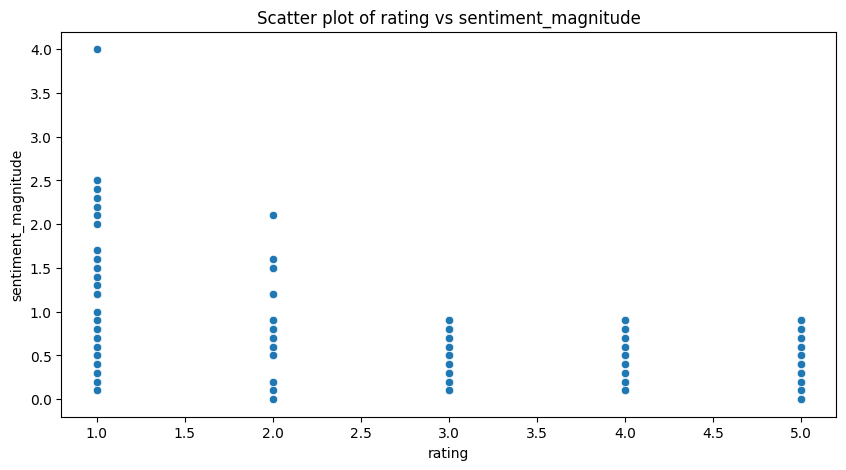

Correlation between rating and sentiment_magnitude:  -0.02879112784985433


In [122]:
# Scatter plot and correlation coefficient for `rating` vs `sentiment_magnitude`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['rating'], y=data['sentiment_magnitude'])
plt.title('Scatter plot of rating vs sentiment_magnitude')
plt.show()

# Calculate and display correlation coefficient
correlation = data['rating'].corr(data['sentiment_magnitude'])
print(f"Correlation between rating and sentiment_magnitude: ", correlation)


### Conclusion for `rating` and `sentiment_magnitude`

Insights from the relationship between `rating` and `sentiment_magnitude`, including correlation strength and observed patterns in the scatter plot.

### Pairwise Analysis: `rating` and `confidence`

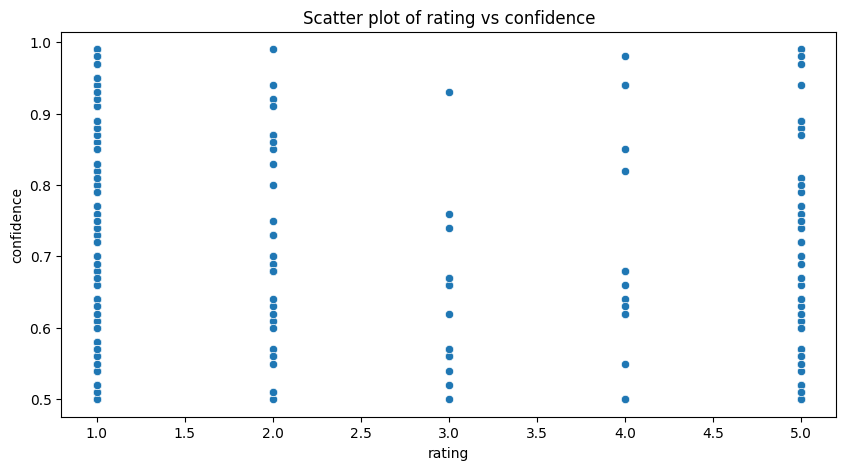

Correlation between rating and confidence:  -0.055513711774153665


In [123]:
# Scatter plot and correlation coefficient for `rating` vs `confidence`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['rating'], y=data['confidence'])
plt.title('Scatter plot of rating vs confidence')
plt.show()

# Calculate and display correlation coefficient
correlation = data['rating'].corr(data['confidence'])
print(f"Correlation between rating and confidence: ", correlation)


### Conclusion for `rating` and `confidence`

Insights from the relationship between `rating` and `confidence`, including correlation strength and observed patterns in the scatter plot.

### Pairwise Analysis: `sentiment_score` and `sentiment_magnitude`

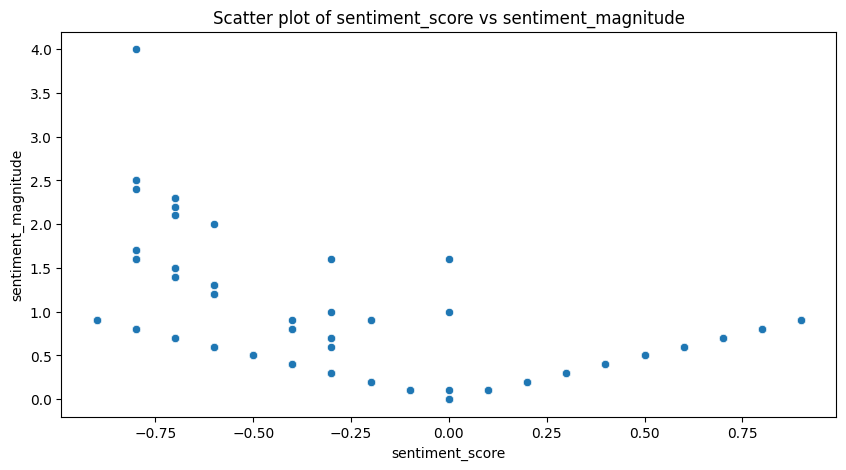

Correlation between sentiment_score and sentiment_magnitude:  0.0210538349657367


In [124]:
# Scatter plot and correlation coefficient for `sentiment_score` vs `sentiment_magnitude`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['sentiment_score'], y=data['sentiment_magnitude'])
plt.title('Scatter plot of sentiment_score vs sentiment_magnitude')
plt.show()

# Calculate and display correlation coefficient
correlation = data['sentiment_score'].corr(data['sentiment_magnitude'])
print(f"Correlation between sentiment_score and sentiment_magnitude: ", correlation)


### Conclusion for `sentiment_score` and `sentiment_magnitude`

Insights from the relationship between `sentiment_score` and `sentiment_magnitude`, including correlation strength and observed patterns in the scatter plot.

### Pairwise Analysis: `sentiment_score` and `confidence`

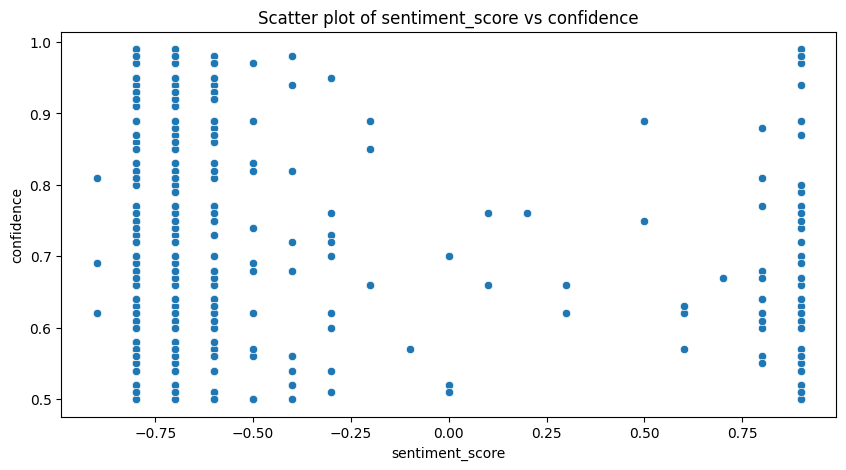

Correlation between sentiment_score and confidence:  -0.049211662365738415


In [125]:
# Scatter plot and correlation coefficient for `sentiment_score` vs `confidence`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['sentiment_score'], y=data['confidence'])
plt.title('Scatter plot of sentiment_score vs confidence')
plt.show()

# Calculate and display correlation coefficient
correlation = data['sentiment_score'].corr(data['confidence'])
print(f"Correlation between sentiment_score and confidence: ", correlation)


### Conclusion for `sentiment_score` and `confidence`

Insights from the relationship between `sentiment_score` and `confidence`, including correlation strength and observed patterns in the scatter plot.

### Pairwise Analysis: `sentiment_magnitude` and `confidence`

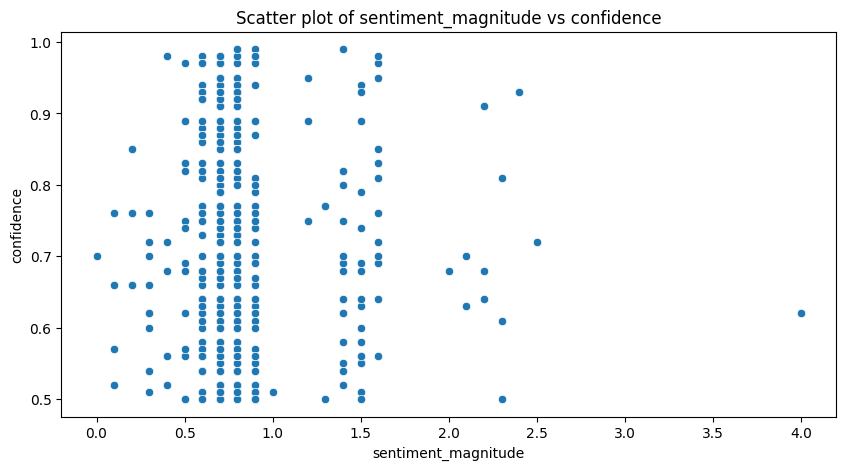

Correlation between sentiment_magnitude and confidence:  0.025303373726456375


In [126]:
# Scatter plot and correlation coefficient for `sentiment_magnitude` vs `confidence`
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['sentiment_magnitude'], y=data['confidence'])
plt.title('Scatter plot of sentiment_magnitude vs confidence')
plt.show()

# Calculate and display correlation coefficient
correlation = data['sentiment_magnitude'].corr(data['confidence'])
print(f"Correlation between sentiment_magnitude and confidence: ", correlation)


### Conclusion for `sentiment_magnitude` and `confidence`

Insights from the relationship between `sentiment_magnitude` and `confidence`, including correlation strength and observed patterns in the scatter plot.

## Enhanced Individual Analysis by Column

In [127]:

# Identify and separate columns by type for individual analysis
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['review', 'rating', 'sentiment_score', 'sentiment_magnitude', 'confidence']
Categorical Columns: ['name', 'company', 'country', 'date', 'topic', 'content', 'entities', 'review_class', 'positive_reasons', 'negative_reasons', 'detected_language', 'category', 'month_year']


### Numerical to Numerical Analysis (Individual)

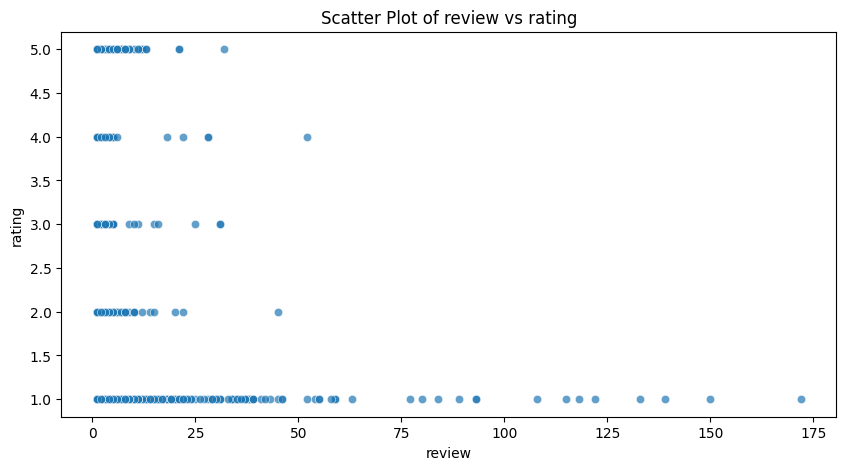

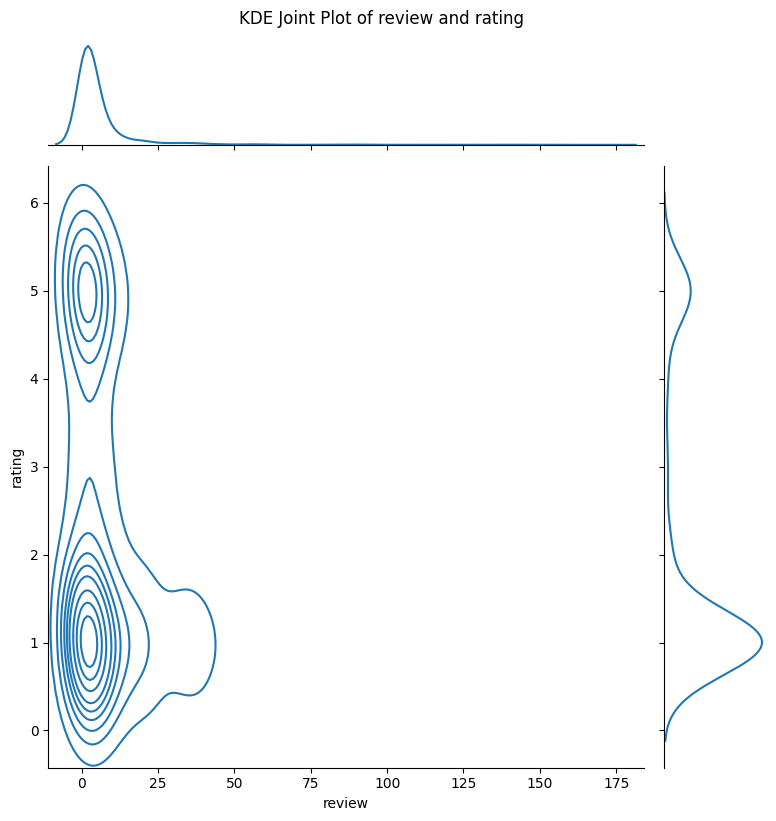

Correlation between review and rating: -0.12


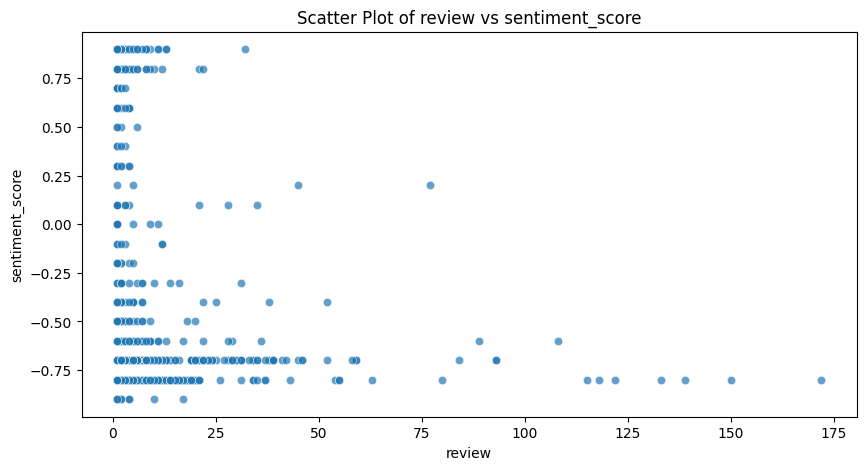

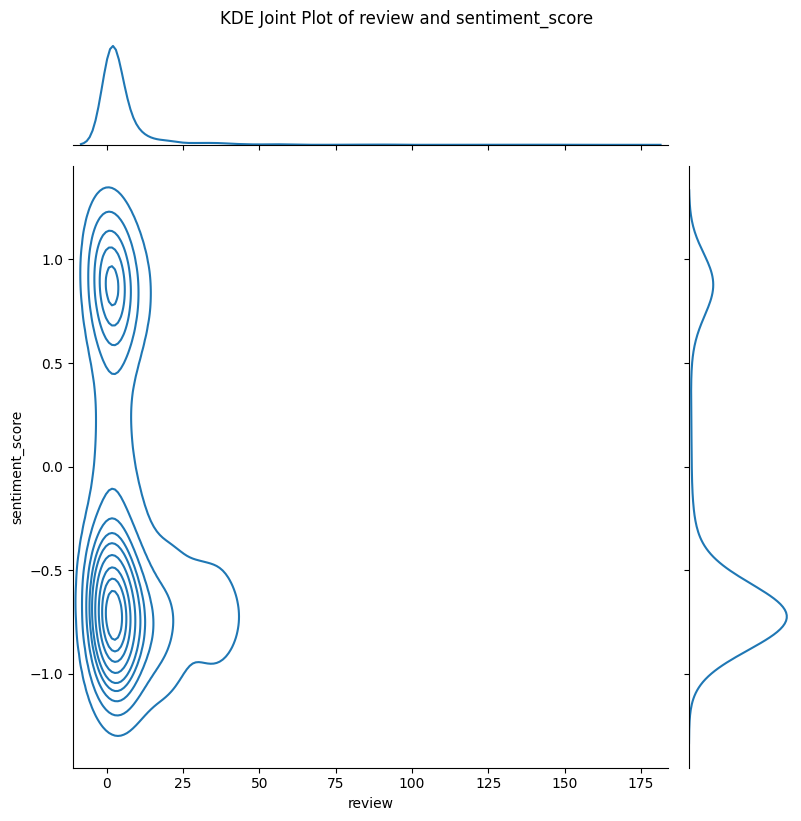

Correlation between review and sentiment_score: -0.12


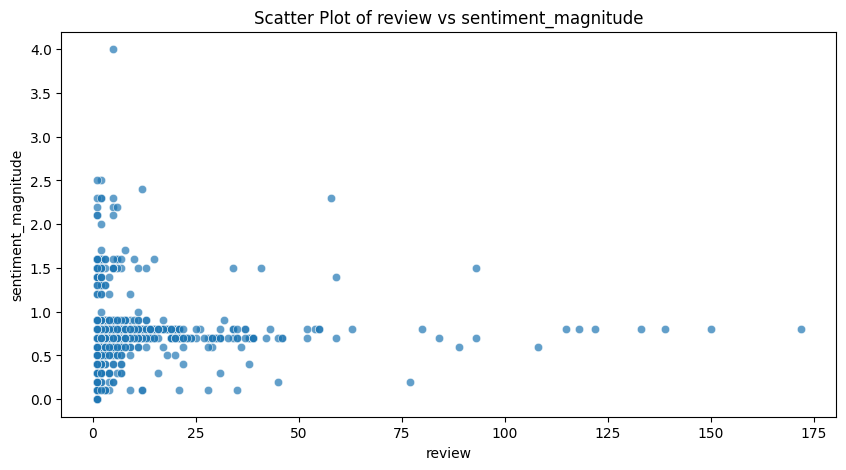

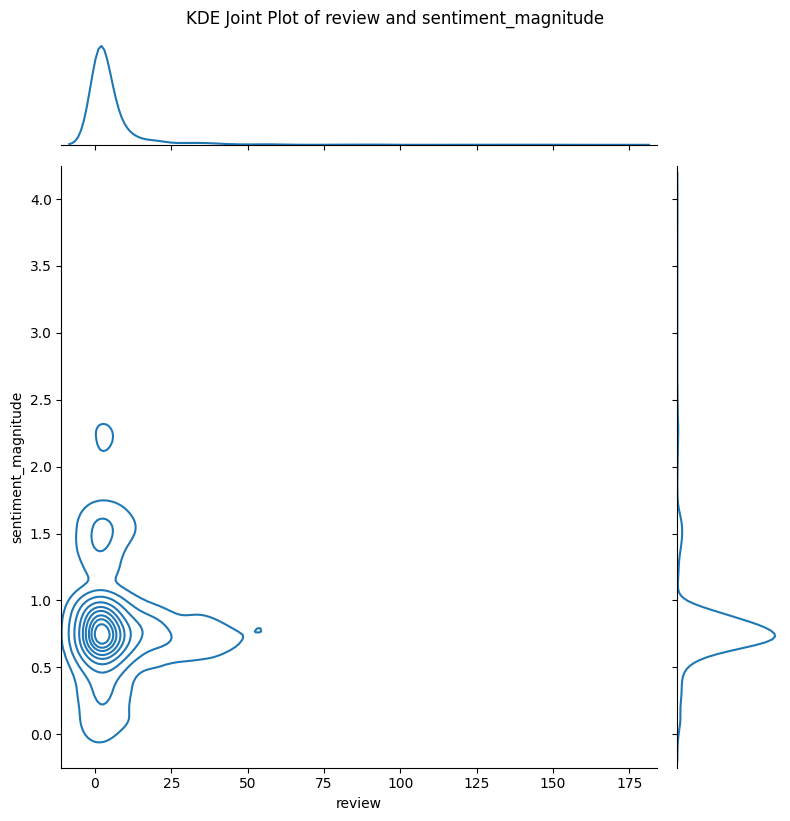

Correlation between review and sentiment_magnitude: -0.01


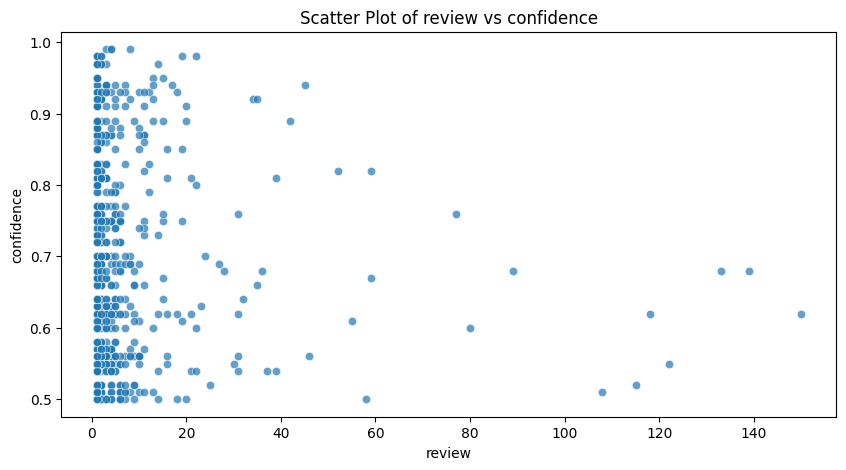

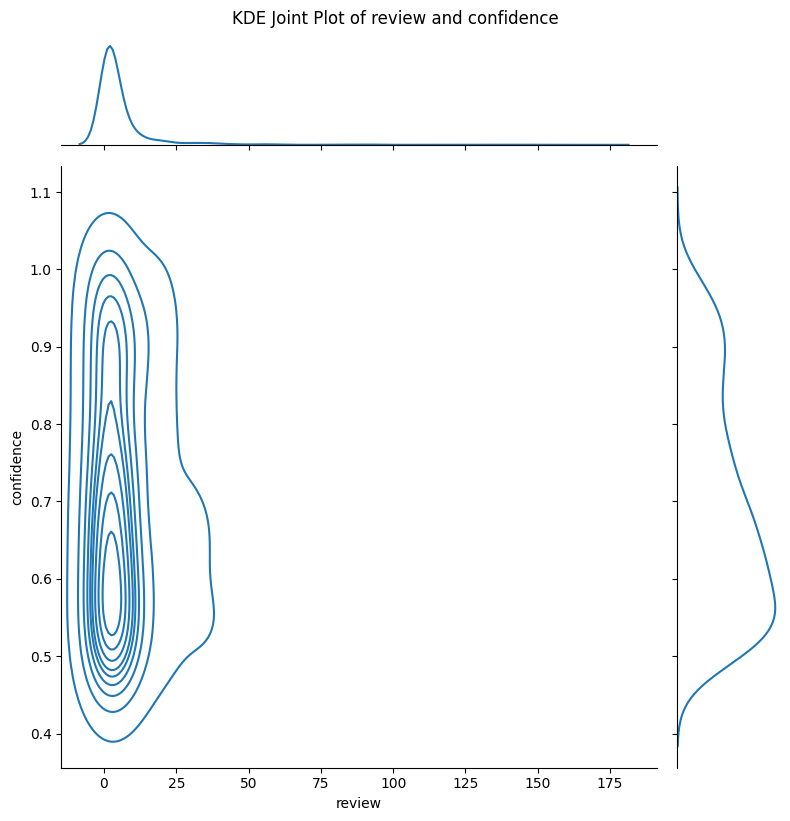

Correlation between review and confidence: -0.04


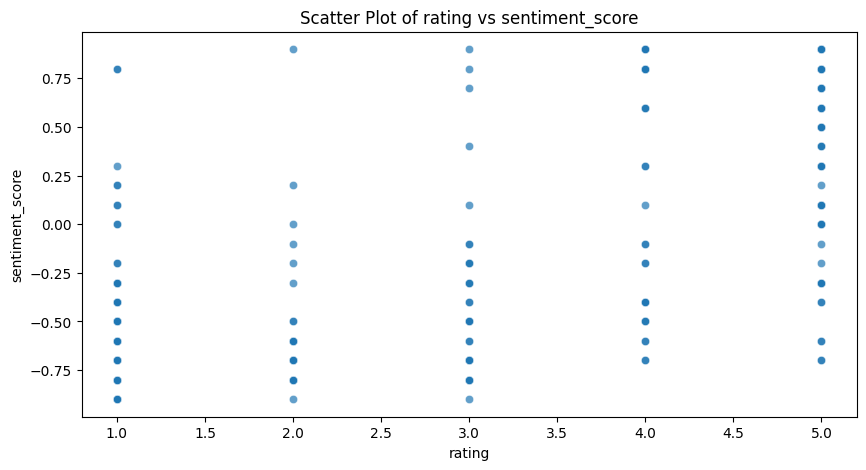

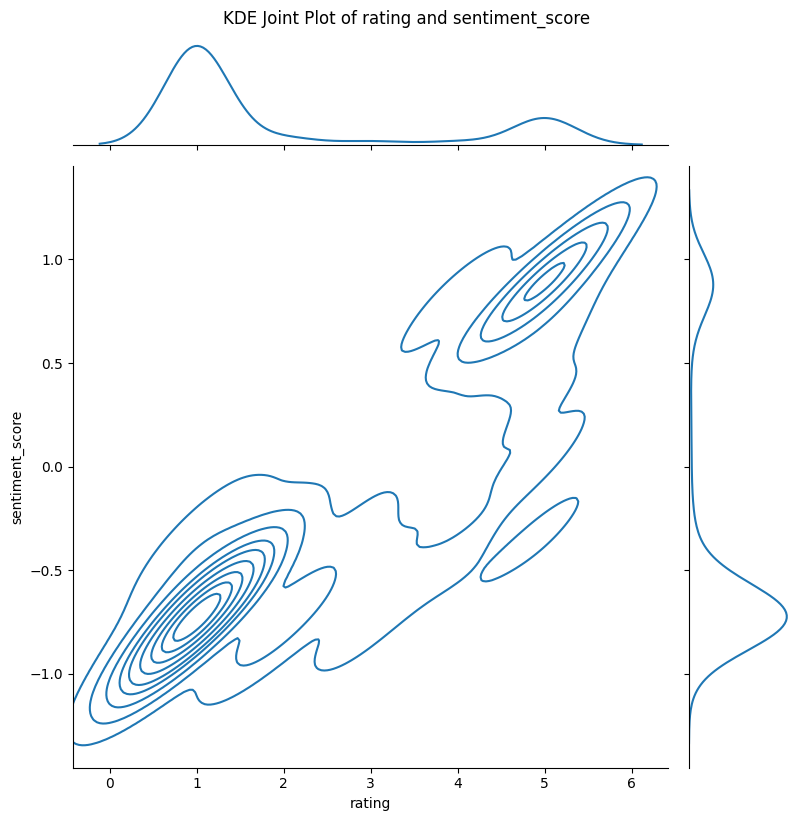

Correlation between rating and sentiment_score: 0.92


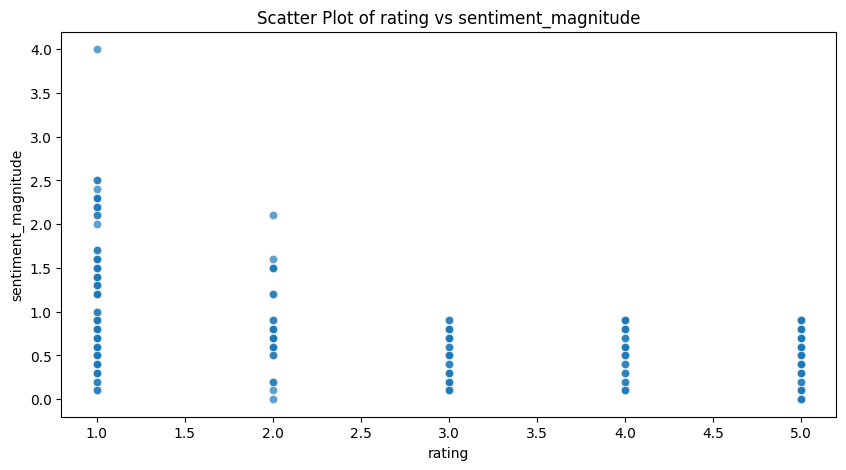

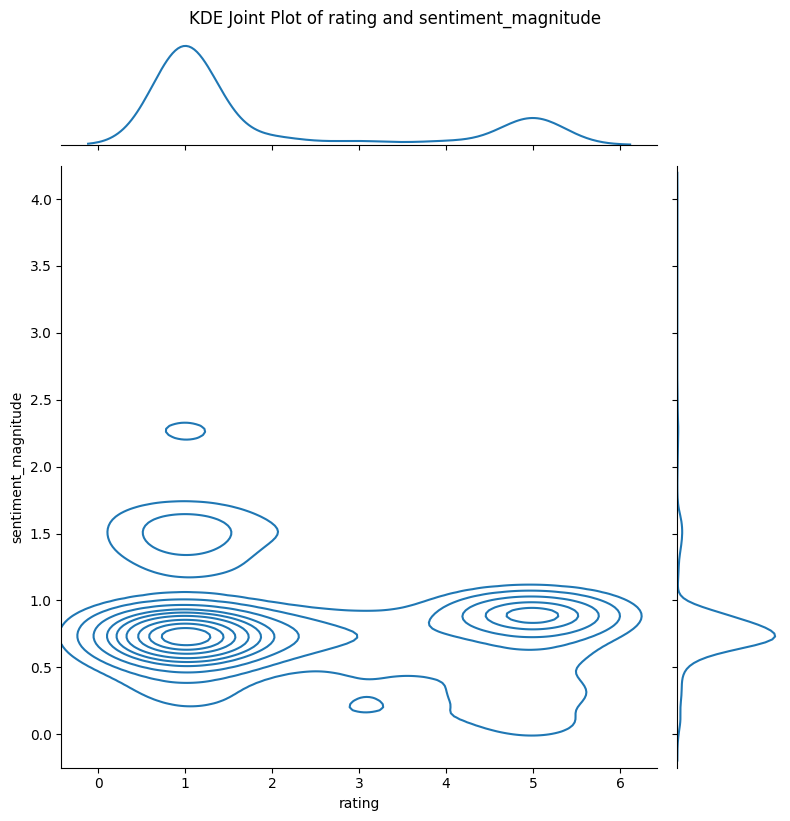

Correlation between rating and sentiment_magnitude: -0.03


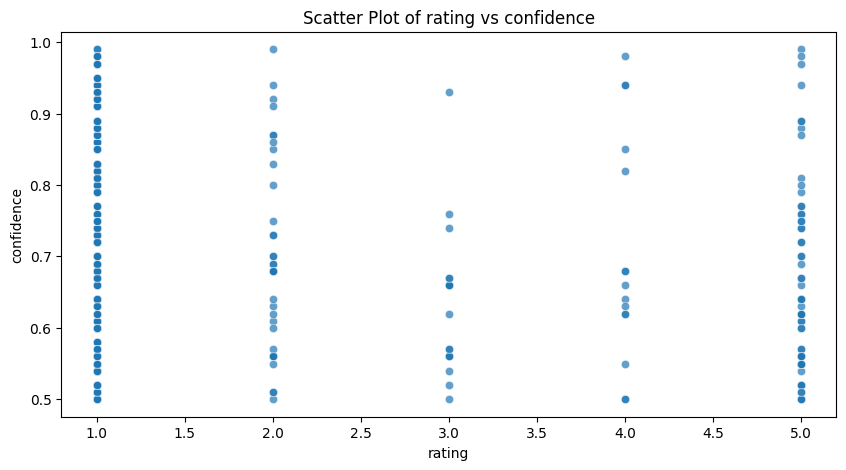

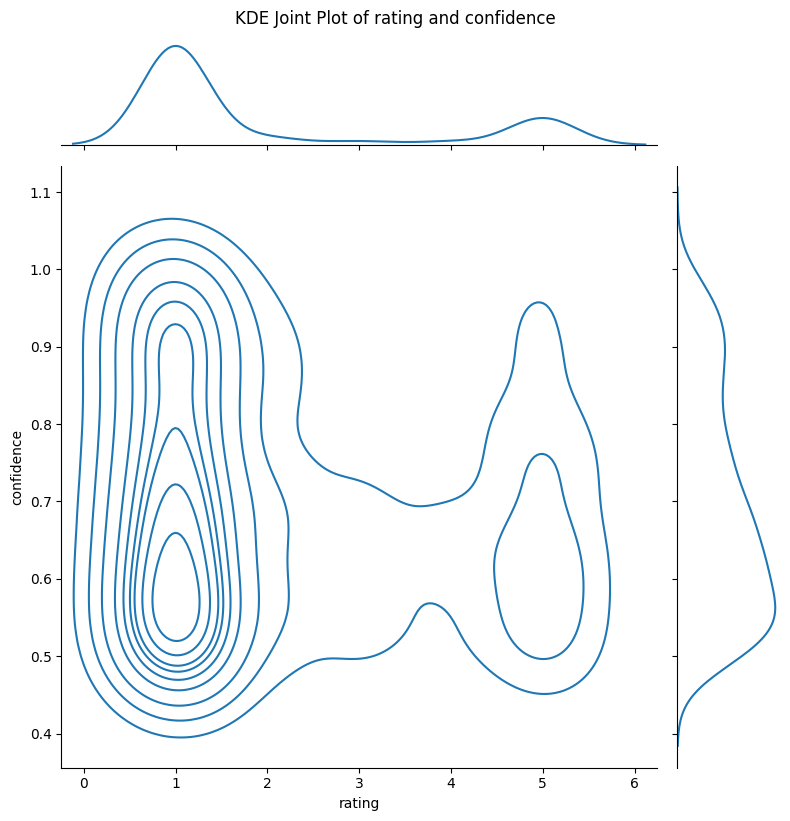

Correlation between rating and confidence: -0.06


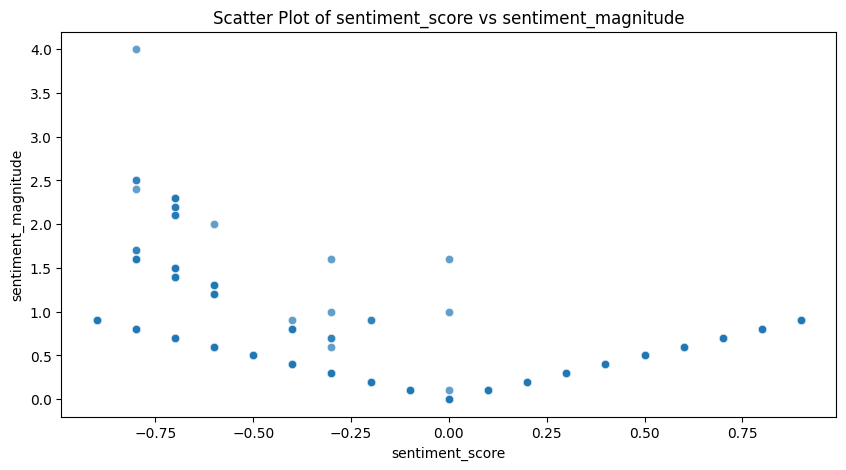

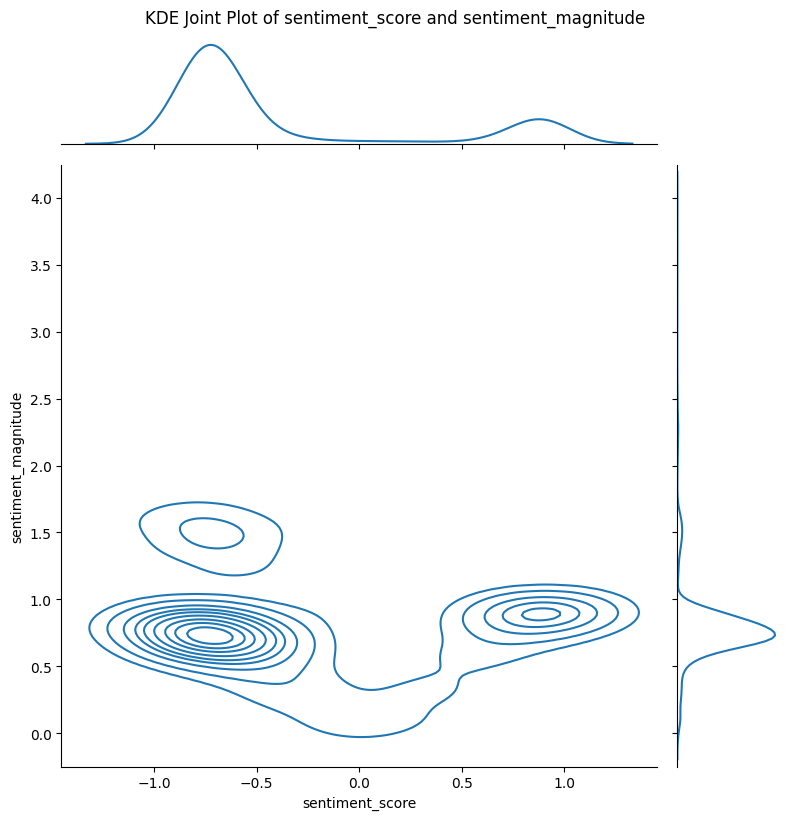

Correlation between sentiment_score and sentiment_magnitude: 0.02


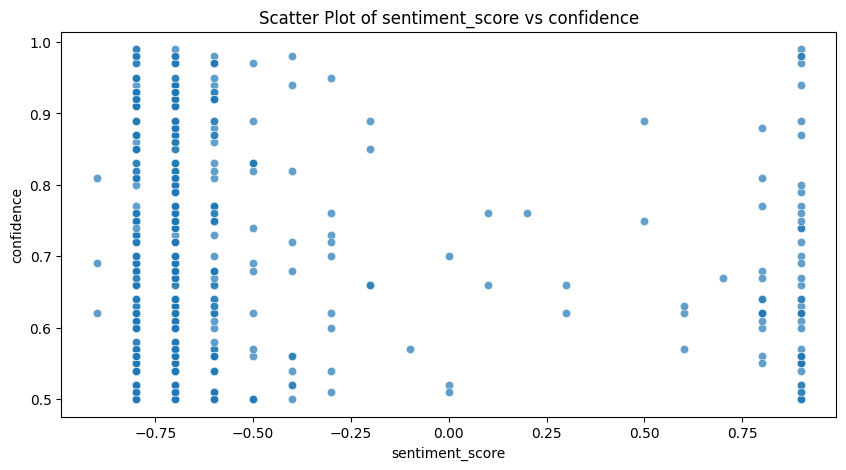

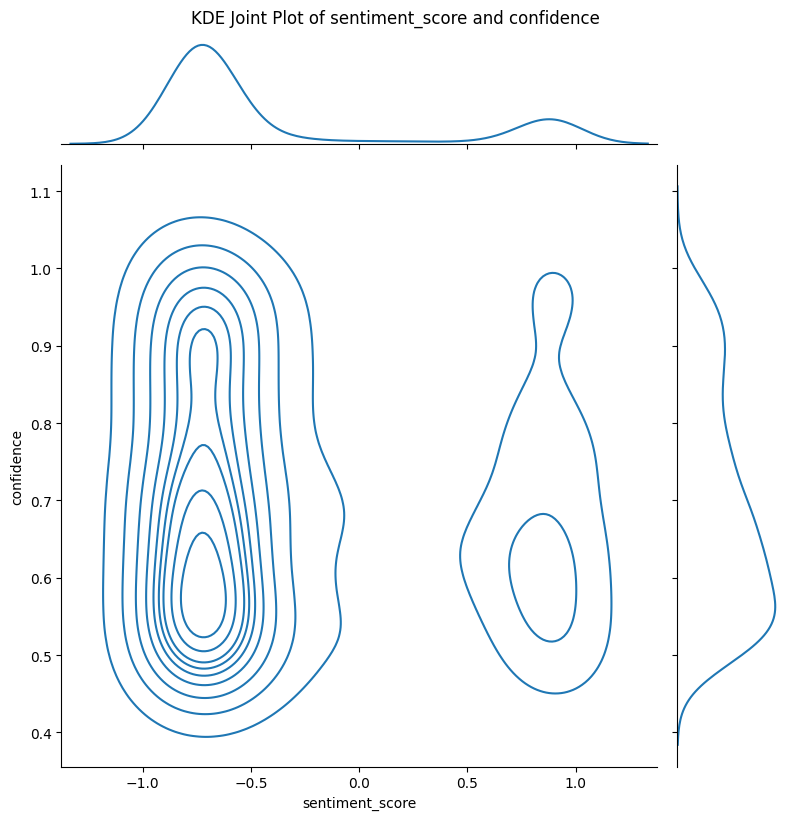

Correlation between sentiment_score and confidence: -0.05


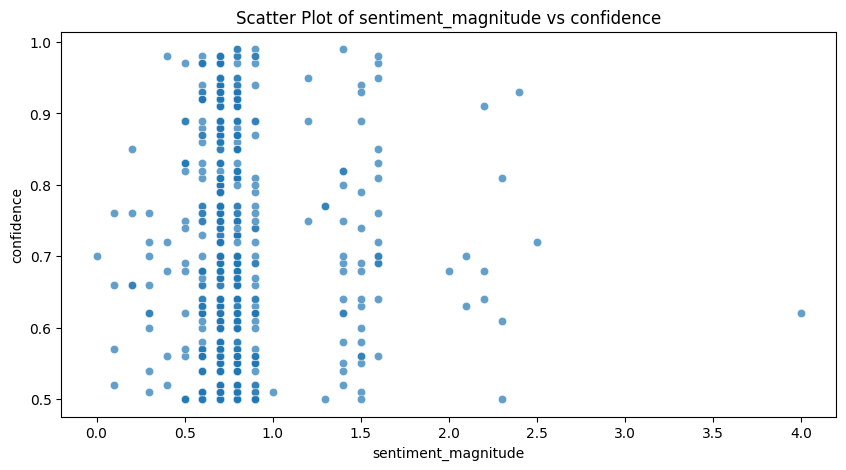

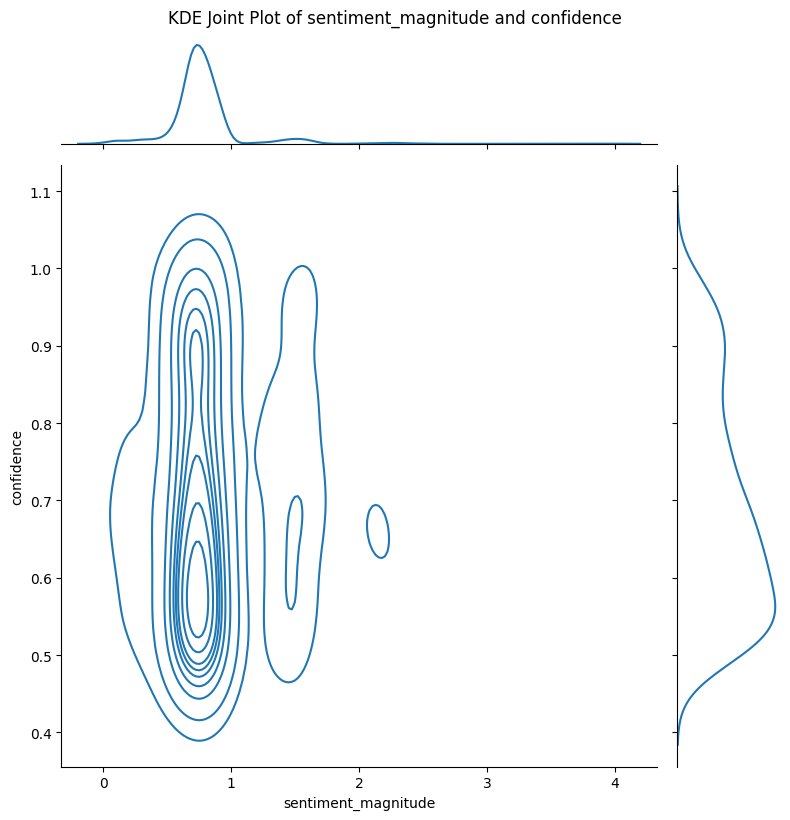

Correlation between sentiment_magnitude and confidence: 0.03


In [128]:

# For each pair of numerical columns, provide individual scatter plots and correlation
for i, num_col1 in enumerate(numerical_columns):
    for num_col2 in numerical_columns[i+1:]:
        # Scatter Plot
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=data[num_col1], y=data[num_col2], alpha=0.7)
        plt.title(f'Scatter Plot of {num_col1} vs {num_col2}')
        plt.show()
        
        # Joint KDE plot for each pair
        sns.jointplot(x=data[num_col1], y=data[num_col2], kind="kde", height=8)
        plt.suptitle(f'KDE Joint Plot of {num_col1} and {num_col2}', y=1.02)
        plt.show()

        # Print correlation
        correlation = data[[num_col1, num_col2]].corr().iloc[0, 1]
        print(f"Correlation between {num_col1} and {num_col2}: {correlation:.2f}")


### Numerical to Categorical Analysis (Individual)

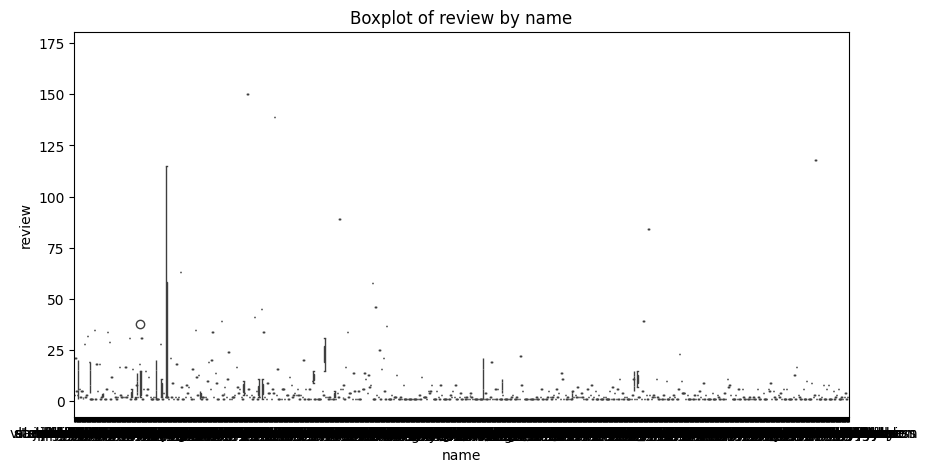

KeyboardInterrupt: 

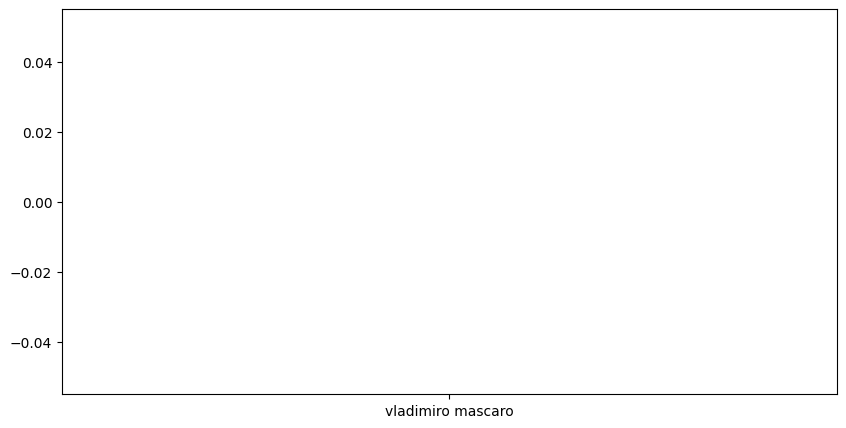

In [129]:

# Box plots, violin, and swarm plots for individual numerical-categorical pairs
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        # Box Plot
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data[cat_col], y=data[num_col])
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.show()

        # Violin Plot
        plt.figure(figsize=(10, 5))
        sns.violinplot(x=data[cat_col], y=data[num_col])
        plt.title(f'Violin Plot of {num_col} by {cat_col}')
        plt.show()

        # Swarm Plot
        plt.figure(figsize=(10, 5))
        sns.swarmplot(x=data[cat_col], y=data[num_col], alpha=0.6)
        plt.title(f'Swarm Plot of {num_col} by {cat_col}')
        plt.show()

        # ANOVA Test for each categorical group
        unique_groups = [data[num_col][data[cat_col] == group] for group in data[cat_col].unique()]
        anova_result = f_oneway(*unique_groups)
        print(f"ANOVA Test Results for {num_col} by {cat_col}: {anova_result}")


### Categorical to Categorical Analysis (Individual)

In [143]:

# Chi-Square test with bar plots and heatmaps for each pair of categorical variables
for i, cat_col1 in enumerate(categorical_columns):
    for cat_col2 in categorical_columns[i+1:]:
        # Contingency table and chi-square test
        contingency_table = pd.crosstab(data[cat_col1], data[cat_col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test between {cat_col1} and {cat_col2}:\nChi2: {chi2}, P-value: {p}")
        
        # Stacked Bar Plot
        contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Stacked Bar Plot of {cat_col1} by {cat_col2}')
        plt.show()

        # Heatmap of contingency table
        plt.figure(figsize=(8, 6))
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Heatmap of {cat_col1} vs {cat_col2} Contingency Table')
        plt.show()


NameError: name 'chi2_contingency' is not defined